# **【はじめに】**

前回までに2回でいわゆる「古典的な機械学習（machined learning）」についての復習は終えることとし、いよいよ**深層学習（deep learning）**について取り掛かることとする。

既に頻用されている深層学習であるが、まずもってその原理的な部分を十分押さえておく必要があるので、**多層パーセプトロン（multilayer perceptron）**を最初に取り上げることとする。深層学習の「根本」とも言えるこの多層パーセプトロンの原理的な発明には我が国有数の人工知能科学者が深く関わっていることをまずもって認識してもらいたい（同時にその功績がなぜ「ノーベル賞受賞」と言う形で結実しなかったのかについても）。

その上で2012年以降の「人工知能ブーム」の火付け役となった画像認識を得意とする**畳込みニューラルネットワーク（CNN）**について演習を行う。これもまた今となってはかなり古典的なアルゴリズムであるが、基本中の基礎として押さえておきたい。

今回最後には**強化学習（reinforcement learning）**について復習する。これについてはいわゆる生成AI（generative AI）へと連なるアルゴリズムであり、基本を押さえておくべきではあるが、他方で後者によってその使命は乗り越えられたとも言える存在であることも認識すべきではある。その限界と今なお残されている実装の有用性について考えて行きたい。

# **●多層パーセプトロン（multilayer perceptron）**

単純パーセプトロンは入力層と出力層のみからなる二層のニューラルネットワークである。多層パーセプトロンはこれに隠れ層（中間層）が加わった、最低三層からなるニューラルネットワークである。

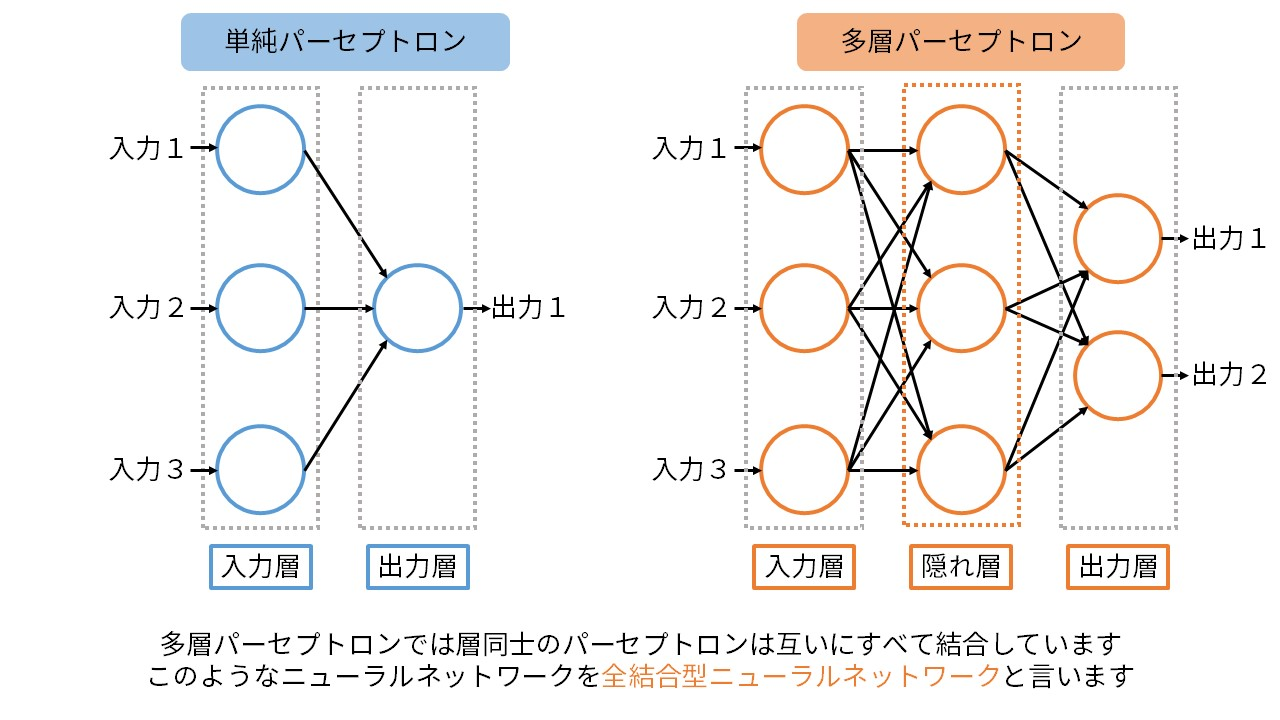


単層パーセプトロンでは線形分離しか不可能であるが、多層パーセプトロンでは中間層（隠れ層）の導入により、非線形分離も可能であることが分かっている。なお、カギとなる誤差逆伝播法（バックプロパゲーション）についてはhttps://rhuang.cis.k.hosei.ac.jp/Miccl/ProjectA/L10-2016.pdfを参照のこと。


In [11]:
#それでは早速、多層パーセプトロンのモデルを構築してみる。
#データとしてはMNISTを用いる。詳細はCNN（次項目）を参照。

from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
# modelを構築する。

model = tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape=(28, 28)),
# Use the string name for the activation function
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dropout(0.2),
# Use the string name for the activation function
tf.keras.layers.Dense(10, activation='softmax')
])

# Use the string names for the optimizer, loss, and metrics
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [ ]:
#modelを図示してみる。

from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
#実際にmodelを学習させ、性能を評価してみる。

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test, verbose=2)

**【課題】**

上記のパーセプトロンが（1）どの様な形状のものであり、（2）flatten, dense, dropoutといった機能が何をやっているものなのかを調べ、説明せよ。

# **●畳込みニューラルネットワーク（convolution neural network, CNN）**

畳み込みニューラルネットワーク (Convolutional Neural Networks; CNN) （以降CNN）は，主に画像認識に利用されるニューラルネットワークの一種である．CNNの原型は，生物の脳の視覚野に関する神経生理学的な知見1を元に考案されたNeocognitron2に見ることができる．Neocognitronは，特徴抽出を行なう単純型細胞に対応する畳み込み層と，位置ずれを許容する働きを持つ複雑型細胞に対応するpooling層とを交互に階層的に配置したニューラルネットワークである．Neocognitronでは自己組織化による学習が行われていたが，その後，LeCunらによりCNNのbackpropagationを用いた学習法が確立され，例えばLeNet3は，文字認識において成功を収めた．

2000年代においては，画像認識分野では，SIFT4等の職人芸的に設計された特徴ベクトルと，SVM等の識別器を組合せた手法が主流となっていた．その時代においてもニューラルネットワークの研究は進められており，ついに2012年の画像認識コンペティションImageNet Large Scale Visual Recognition Competition (ILSVRC) において，AlexNetと呼ばれるCNNを用いた手法が，それまでの画像認識のデファクトスタンダードであったSIFT + Fisher Vector + SVM5というアプローチに大差をつけて優勝し，一躍深層学習が注目されることとなった．

それ以降のILSVRCでは，CNNを用いた手法が主流となり，毎年新たなCNNのモデルが適用され，一貫して認識精度の向上に寄与してきた．そしてILSVRCで優秀な成績を収めたモデルが，画像認識やその他の様々なタスクを解くためのデファクトスタンダードなモデルとして利用されてきた．　（以上、https://qiita.com/yu4u/items/7e93c454c9410c4b5427より引用）。

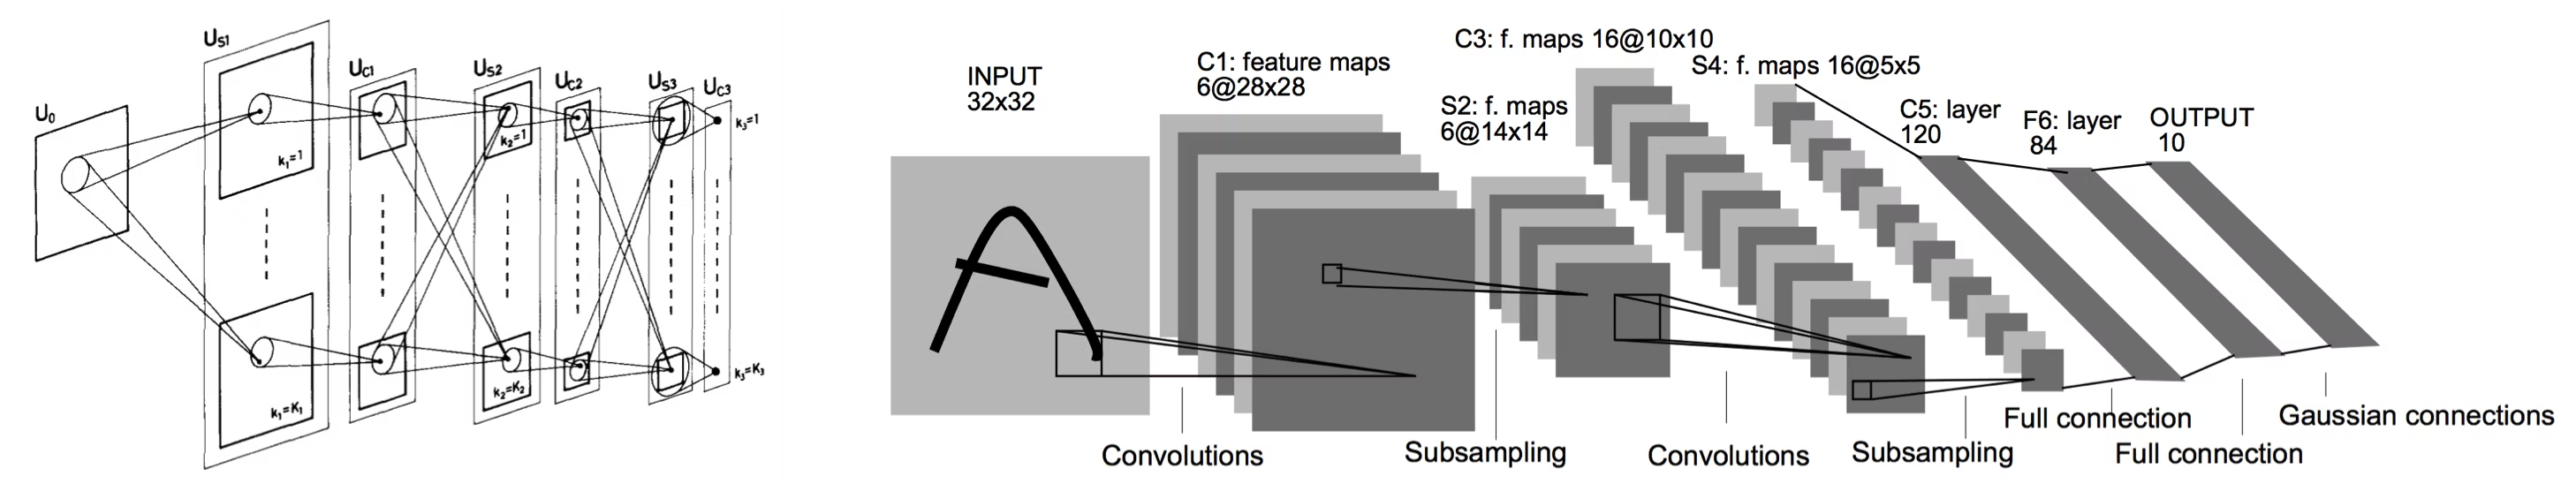




# **●CNNの基本的な仕組みを学んでみよう。**

**畳み込み層(Convolution)とは**

画像の特徴点を見つけること。

画像にカーネルを充てることで特徴点(特徴マップ)を得る。

カーネルの数字によって抽出できる特徴が変わる。

CNNにおいてカーネルが重みであり、よいCNNモデルとは最適なカーネルを持ったモデルのことを言う。

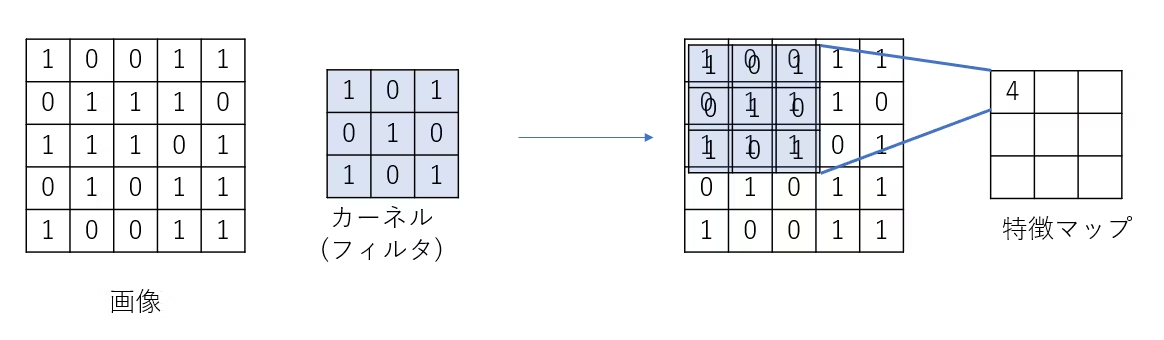

**プーリング層(Pooling)とは**

識別に不必要な特徴量をそぎ落とす。識別に必要な特徴量を抽出する処理を言う
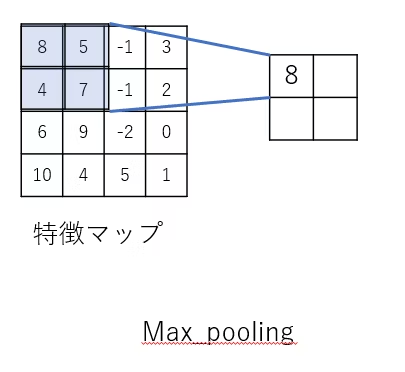




**全結合層(Dense)とは**

畳み込み層も、プーリング層も、出力は画像のまま(特徴マップ)である。

最終的には画像を与えると、1~9のように識別したいので、出力を１次元にしたい。その
ために全結合層がある。

全結合層の前にFlatten層で平坦化する。

In [ ]:
#画像認識のための典型的なアルゴリズムであるCNNを学んで行きます。
#データセットハMNISTを用います。

#まずはライブラリーからダウンロードする。

import keras
from keras.datasets import mnist

# mnist からトレーニングデータセットとバリデーションデータセットをダウンロードする
# xは画像データ、yは画像の判定ラベル
# x_trainデータは28*28ピクセル画像が60000枚 (60000, 28, 28)
# x_testデータは28*28ピクセル画像が10000枚 (10000, 28, 28)

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
#試しに画像を128枚ほど出してみる。手書きの数字が映し出される。

import numpy as np
from PIL import Image

# 文字画像表示
def ConvertToImg(img):
    return Image.fromarray(np.uint8(img))

# MNIST一文字の幅
chr_w = 28
# MNIST一文字の高さ
chr_h = 28
# 表示する文字数
num = 128

# MNISTの文字をPILで１枚の画像に描画する
canvas = Image.new('RGB', (int(chr_w * num/2), int(chr_h * num/2)), (255, 255, 255))

# MNISTの文字を読み込んで描画
i = 0
for y in range( int(num/2) ):
    for x in range( int(num/2) ):
        chrImg = ConvertToImg(x_train[i].reshape(chr_w, chr_h))
        canvas.paste(chrImg, (chr_w*x, chr_h*y))
        i = i + 1

canvas.show()
# 表示した画像をJPEGとして保存
canvas.save('mnist.jpg', 'JPEG', quality=100, optimize=True)

canvas

In [3]:
#次にデータの前処理(preprocessing)を行う。
#正解ラベル(y)を 10個の確率データ の形式に変換する。今の正解ラベルは 1~9のラベルになっており、学習モデルの出力形式である10個の確率データに合わないため。例: [0, 1, ..., 0]。左から数字1,2, ... 9の確率
#画像データ(x)は扱いやすいように 0~1の間の数値にする。今は min:0(白) ~ max:255(黒)を表す。

from keras.utils import to_categorical

# mnistの画像データはグレースケール画像であり、min:0(白)~max:255(黒)を表す。入力を0~1の範囲にした方が都合がよいので255で割る。
X_train = x_train.reshape(60000, 28,28,1)/255
X_test = x_test.reshape(10000, 28,28,1)/255
# 学習モデルの出力が 10個の確率データ(例: [0, 1, ..., 0])になるので、今の形式(画像が0~9のうちのどの数字か)はかみ合わない。そこで形式をそろえるために変換する
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

In [ ]:
#学習モデルを構築してみる。

from keras.models import Sequential
from keras.layers import Dense , Activation, Convolution2D , MaxPooling2D, Flatten

model = Sequential()
model.add(Convolution2D(10, (5,5), input_shape=(28,28,1), activation="relu")) # 2D畳み込み層
model.add(MaxPooling2D(2,2)) # Maxプーリング層
model.add(Convolution2D(10, (5,5), padding="same"))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(10, (5,5), padding="same"))
model.add(MaxPooling2D(2,2))
model.add(Flatten()) # 平坦化層。入力画像を１次元配列に変換して出力する。全結合層に接続する前に使われる。
model.add(Dense(10, activation="softmax")) # 全結合層

In [ ]:
#modelを図示してみる。

from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
#前段で構築したsequentialモデルにデータセットを実装し、学習済みモデルを作る。

from keras.callbacks import EarlyStopping

# metricsをリストとして渡すように修正
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

# 学習
model.fit(X_train, Y_train, epochs=1, batch_size=100, validation_data=(X_test, Y_test), callbacks=[EarlyStopping()])

# モデル評価
score = model.evaluate(X_test, Y_test, verbose=0)
print("loss:", score[0])
print("accuracy:", score[1])

#学習モデルの評価についてはlossはモデルの出力値と、教師データの結果の誤差。0に近いほど良い。accuracyはモデルの出力値の正答率。1に近いほどよい。

**【課題】**

上記のモデルについて更に性能を向上させるための工夫を施してみよ。

In [ ]:
#学習済みモデルを用いて推論してみる。

import matplotlib.pyplot as plt
from keras.models import load_model

# 学習済みモデルを保存しておく
model.save('MNIST_NN.h5')
MNIST_NN = load_model('MNIST_NN.h5')

# 学習済みモデルに、mnistのバリデーション画像を渡して推論してみる
predicted = MNIST_NN.predict(x_test[0].reshape(1, 28, 28, 1))
print(np.argmax(predicted)) # 最も確率の高い数字を出力する

In [ ]:
#果たして正解か？

plt.imshow(x_test[0], cmap=plt.cm.gray_r)
plt.show

**【課題】**

他の順番の画像についても同一のモデルで推論し、正解が出力されているのかを確認せよ。

**【総合課題】**

―米国人たちによる手書き数字を用いたMNISTに対して、我が国の「くずし文字」に関するデータセットであるKMNISTがある。これを用いて同様のモデル構築をし、評価せよ。[なおKMNISTのデータダウンロードなどは以下を参照してみること。](https://sw1227.hatenablog.com/entry/2018/12/10/002329)

In [ ]:
#もう一つ、CNNの実装例として画像認識による異常検知（anomaly detection）を行う。

# ライブラリのインストール
!pip install -q tensorflow matplotlib numpy

# コード本体
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist

# データ読み込み
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# スニーカー(7)のみを正常データ、それ以外を異常データと定義
x_train = x_train[y_train == 7]
x_test_anom = x_test[y_test != 7]
x_test_norm = x_test[y_test == 7]

# 正規化と形状変更
x_train = x_train.astype("float32") / 255.0
x_test_anom = x_test_anom.astype("float32") / 255.0
x_test_norm = x_test_norm.astype("float32") / 255.0
x_train = np.expand_dims(x_train, -1)
x_test_anom = np.expand_dims(x_test_anom, -1)
x_test_norm = np.expand_dims(x_test_norm, -1)

# Autoencoderモデル定義
def build_autoencoder():
    input_img = tf.keras.Input(shape=(28, 28, 1))
    x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input_img)
    x = layers.MaxPooling2D((2, 2), padding="same")(x)
    x = layers.Conv2D(16, (3, 3), activation="relu", padding="same")(x)
    encoded = layers.MaxPooling2D((2, 2), padding="same")(x)

    x = layers.Conv2D(16, (3, 3), activation="relu", padding="same")(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

    autoencoder = models.Model(input_img, decoded)
    autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
    return autoencoder

autoencoder = build_autoencoder()

# 学習
autoencoder.fit(
    x_train, x_train,
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_split=0.1,
    verbose=2
)

# 再構成誤差を計算
def compute_errors(x, model):
    recon = model.predict(x)
    errors = np.mean((x - recon) ** 2, axis=(1, 2, 3))
    return errors, recon

errors_norm, recon_norm = compute_errors(x_test_norm, autoencoder)
errors_anom, recon_anom = compute_errors(x_test_anom, autoencoder)

# 結果を可視化
plt.figure(figsize=(10, 5))
plt.hist(errors_norm, bins=50, alpha=0.6, label="normal (sneakers)")
plt.hist(errors_anom, bins=50, alpha=0.6, label="anomaly (others)")
plt.xlabel("Reconstruction error")
plt.ylabel("Count")
plt.title("Anomaly Detection based on Reconstruction Error")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#ちなみに正解データ（スニーカー（ラベル7））の25枚の画像を示すと次のとおり

import matplotlib.pyplot as plt

# スニーカー（ラベル7）の画像を最初の25枚だけ表示
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title("Sneaker")
plt.tight_layout()
plt.show()


**【課題】**

上記のanomaly detectionのコードを精査し、それぞれの部分がどの様な意味を持っているのか、また最終的に出力されるグラフが何を示しているのかについて考察して述べよ。

# **●強化学習（reinforcement learning）**

強化学習（reinforcement learning、RL）は、ある環境内における知的エージェントが、現在の状態を観測し、得られる収益（累積報酬）を最大化するために、どのような行動をとるべきかを決定する機械学習の一分野である。強化学習は、教師あり学習、教師なし学習と並んで、3つの基本的な機械学習パラダイムの一つである。

強化学習が教師あり学習と異なる点は、ラベル付きの入力／出力の組を提示する必要がなく、最適でない行動を明示的に修正する必要もない。その代わり、未知の領域の探索と、現在の知識の活用の間のバランスを見つけることに重点が置かれる。

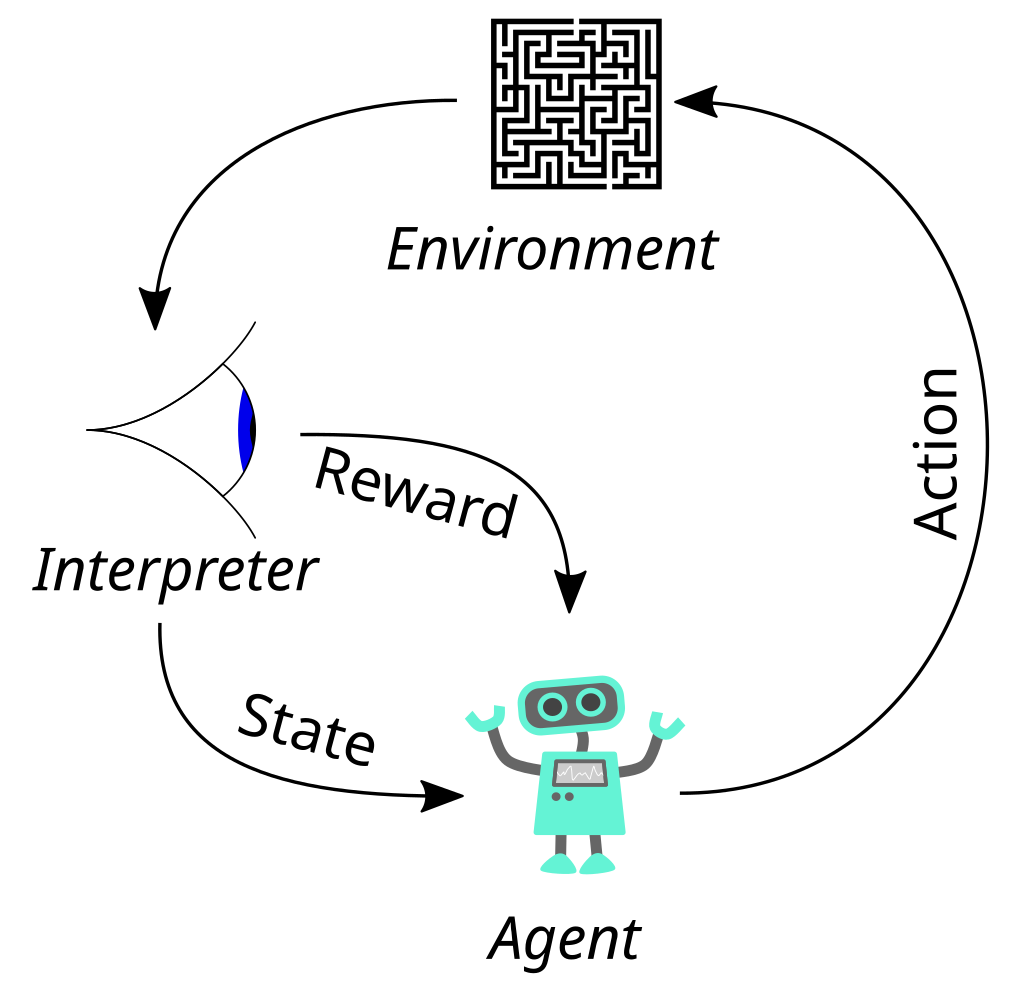

なおマルコフ決定過程など、関連項目についてはhttps://qiita.com/pocokhc/items/953585fa60fa71651969を参照のこと。

In [1]:
#以下では簡単な強化学習の実装を試みる。
#まずはCartPoleをQ学習で立てるという課題にチャレンジする。
#Q学習についてはhttps://www.tech-teacher.jp/blog/q-learning/を参照のこと。

In [ ]:
# ライブラリのインストール（Colab用）
!pip install gym[classic_control] matplotlib --quiet

# ライブラリのインポート
import gym
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

# CartPole-v1 環境作成（アニメーション描画用に render_mode 指定）
env = gym.make("CartPole-v1", render_mode="rgb_array")

# 離散化とQ学習パラメータ
num_dizitized = 6
q_table = np.random.uniform(low=-1, high=1, size=(num_dizitized ** 4, env.action_space.n))
num_episodes = 2000
goal_average_reward = 195
max_steps = 200
total_reward_vec = np.zeros(100)

# 離散化関連関数
def bins(clip_min, clip_max, num):
    return np.linspace(clip_min, clip_max, num + 1)[1:-1]

def digitize_state(observation):
    cart_pos, cart_v, pole_angle, pole_v = observation
    digitized = [
        np.digitize(cart_pos, bins=bins(-2.4, 2.4, num_dizitized)),
        np.digitize(cart_v, bins=bins(-3.0, 3.0, num_dizitized)),
        np.digitize(pole_angle, bins=bins(-0.5, 0.5, num_dizitized)),
        np.digitize(pole_v, bins=bins(-2.0, 2.0, num_dizitized))
    ]
    return sum([x * (num_dizitized ** i) for i, x in enumerate(digitized)])

# Q学習関数
def get_action(state, episode):
    epsilon = 0.5 * (1 / (episode + 1))
    return np.argmax(q_table[state]) if epsilon <= np.random.uniform(0, 1) else np.random.choice([0, 1])

def update_q_table(q_table, state, action, reward, next_state):
    alpha = 0.5
    gamma = 0.99
    next_max_q = max(q_table[next_state])
    q_table[state, action] = (1 - alpha) * q_table[state, action] + alpha * (reward + gamma * next_max_q)

# 学習ループ
is_learned = False
for episode in range(num_episodes):
    obs, _ = env.reset()
    state = digitize_state(obs)
    action = get_action(state, episode)
    total_reward = 0

    for t in range(max_steps):
        obs, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        reward = -200 if done and t < 195 else 1
        total_reward += reward
        next_state = digitize_state(obs)
        update_q_table(q_table, state, action, reward, next_state)
        action = get_action(next_state, episode)
        state = next_state
        if done:
            break

    total_reward_vec = np.hstack((total_reward_vec[1:], total_reward))
    if total_reward_vec.mean() >= goal_average_reward:
        print(f"✅ Episode {episode} trained successfully.")
        is_learned = True
        break

# アニメーション作成関数
def create_animation(frames):
    fig = plt.figure(figsize=(6, 4))
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])
        return [patch]

    anim = animation.FuncAnimation(fig, animate, frames=len(frames), interval=50)
    return anim

# 学習完了後のエージェント挙動をキャプチャ
def simulate_episode(env, q_table):
    frames = []
    obs, _ = env.reset()
    state = digitize_state(obs)
    for _ in range(200):
        frame = env.render()
        frames.append(frame)
        action = np.argmax(q_table[state])
        obs, _, terminated, truncated, _ = env.step(action)
        state = digitize_state(obs)
        if terminated or truncated:
            break
    return frames

# アニメーションを表示
if is_learned:
    frames = simulate_episode(env, q_table)
    anim = create_animation(frames)
    HTML(anim.to_jshtml())
else:
    print("❌ 学習未完了。アニメーションは表示できません。")


In [ ]:
HTML(anim.to_jshtml())

**【総合課題】**

強化学習で用いられるアルゴリズムにはQ学習以外に「DQN」「DDQN」などがある。これらが一体何であるのかを調べ、説明をせよ。

参考は以下のとおり。

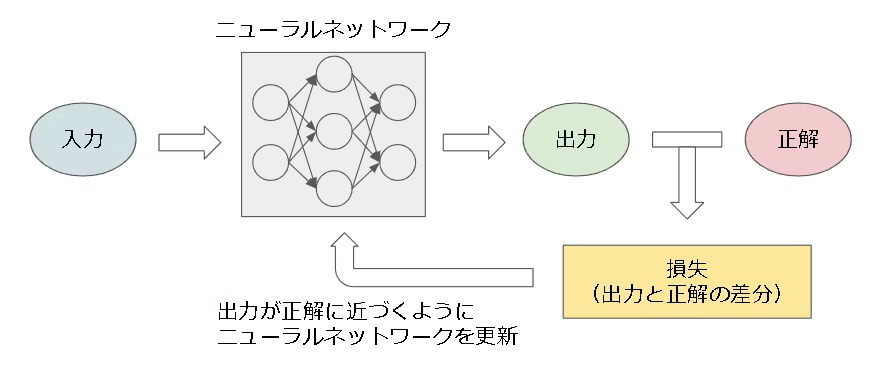

In [3]:
#以下はDQNによる強化学習の実装例

# ライブラリのインストール（pygameを含む）
!pip install gym==0.26.2 pygame imageio

# 必要なモジュールのインポート
import gym
import numpy as np
import tensorflow as tf
import random
from collections import deque
import matplotlib.pyplot as plt
import imageio
from tqdm import tqdm

# DQN用のモデル定義
def build_model(state_size, action_size):
    model = tf.keras.models.Sequential([
        tf.keras.Input(shape=(state_size,)),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dense(action_size, activation='linear')
    ])
    model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
    return model

# 環境とハイパーパラメータの設定
env = gym.make("CartPole-v1", render_mode="rgb_array")
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
model = build_model(state_size, action_size)

# リプレイバッファと学習パラメータ
memory = deque(maxlen=2000)
gamma = 0.95
epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = 0.995
episodes = 300
batch_size = 32

# 学習ループ
for e in tqdm(range(episodes)):
    obs, _ = env.reset()
    total_reward = 0
    done = False
    while not done:
        # ε-greedyによる行動選択
        if np.random.rand() <= epsilon:
            action = random.randrange(action_size)
        else:
            q_values = model.predict(np.array([obs]), verbose=0)
            action = np.argmax(q_values[0])

        next_obs, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        memory.append((obs, action, reward, next_obs, done))
        obs = next_obs
        total_reward += reward

        if done:
            print(f"Episode {e+1}: Reward = {total_reward}")
            break

    # 経験からランダムに学習
    if len(memory) >= batch_size:
        minibatch = random.sample(memory, batch_size)
        states = np.array([x[0] for x in minibatch])
        targets = model.predict(states, verbose=0)
        next_states = np.array([x[3] for x in minibatch])
        next_qs = model.predict(next_states, verbose=0)

        for i, (s, a, r, s_next, done) in enumerate(minibatch):
            targets[i][a] = r if done else r + gamma * np.max(next_qs[i])

        model.fit(states, targets, epochs=1, verbose=0)

    if epsilon > epsilon_min:
        epsilon *= epsilon_decay

# 学習後の可視化（アニメーションGIF）
frames = []
obs, _ = env.reset()
done = False
while not done:
    frame = env.render()
    frames.append(frame)
    q_values = model.predict(np.array([obs]), verbose=0)
    action = np.argmax(q_values[0])
    next_obs, reward, terminated, truncated, _ = env.step(action)
    done = terminated or truncated
    obs = next_obs

# GIF保存
imageio.mimsave("cartpole_dqn.gif", frames, fps=30)
print("🎥 GIF出力完了: cartpole_dqn.gif")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 169.4 MB/s eta 0:00:00


  0%|          | 0/300 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 1: Reward = 11.0
Episode 2: Reward = 10.0
Episode 3: Reward = 13.0


  1%|▏         | 4/300 [00:00<00:51,  5.72it/s]

Episode 4: Reward = 14.0
Episode 5: Reward = 18.0


  2%|▏         | 6/300 [00:00<00:43,  6.79it/s]

Episode 6: Reward = 36.0
Episode 7: Reward = 17.0


  3%|▎         | 8/300 [00:01<00:43,  6.78it/s]

Episode 8: Reward = 9.0
Episode 9: Reward = 14.0


  3%|▎         | 10/300 [00:01<00:42,  6.77it/s]

Episode 10: Reward = 39.0
Episode 11: Reward = 15.0


  4%|▍         | 12/300 [00:01<00:46,  6.21it/s]

Episode 12: Reward = 40.0
Episode 13: Reward = 10.0


  5%|▍         | 14/300 [00:02<00:40,  7.06it/s]

Episode 14: Reward = 8.0
Episode 15: Reward = 11.0


  5%|▌         | 16/300 [00:02<00:41,  6.90it/s]

Episode 16: Reward = 11.0


  6%|▌         | 17/300 [00:02<00:50,  5.66it/s]

Episode 17: Reward = 21.0


  6%|▌         | 18/300 [00:02<00:56,  4.98it/s]

Episode 18: Reward = 32.0


  6%|▋         | 19/300 [00:03<01:07,  4.14it/s]

Episode 19: Reward = 50.0
Episode 20: Reward = 29.0


  7%|▋         | 21/300 [00:03<00:53,  5.17it/s]

Episode 21: Reward = 17.0
Episode 22: Reward = 15.0


  8%|▊         | 23/300 [00:03<00:46,  5.91it/s]

Episode 23: Reward = 12.0


  8%|▊         | 24/300 [00:04<00:49,  5.53it/s]

Episode 24: Reward = 17.0


  8%|▊         | 25/300 [00:04<01:24,  3.24it/s]

Episode 25: Reward = 68.0


  9%|▊         | 26/300 [00:05<01:33,  2.92it/s]

Episode 26: Reward = 32.0
Episode 27: Reward = 11.0


  9%|▉         | 28/300 [00:05<01:06,  4.10it/s]

Episode 28: Reward = 12.0


 10%|▉         | 29/300 [00:05<01:14,  3.62it/s]

Episode 29: Reward = 24.0
Episode 30: Reward = 14.0


 10%|█         | 31/300 [00:06<00:59,  4.50it/s]

Episode 31: Reward = 33.0


 11%|█         | 32/300 [00:06<01:02,  4.30it/s]

Episode 32: Reward = 23.0
Episode 33: Reward = 11.0


 11%|█▏        | 34/300 [00:06<00:53,  5.00it/s]

Episode 34: Reward = 14.0


 12%|█▏        | 35/300 [00:06<00:54,  4.91it/s]

Episode 35: Reward = 14.0


 12%|█▏        | 36/300 [00:07<01:18,  3.36it/s]

Episode 36: Reward = 34.0


 12%|█▏        | 37/300 [00:07<01:14,  3.51it/s]

Episode 37: Reward = 26.0


 13%|█▎        | 38/300 [00:07<01:19,  3.32it/s]

Episode 38: Reward = 23.0


 13%|█▎        | 39/300 [00:08<01:22,  3.17it/s]

Episode 39: Reward = 17.0


 13%|█▎        | 40/300 [00:08<01:17,  3.35it/s]

Episode 40: Reward = 12.0


 14%|█▎        | 41/300 [00:08<01:11,  3.64it/s]

Episode 41: Reward = 21.0


 14%|█▍        | 42/300 [00:09<01:09,  3.70it/s]

Episode 42: Reward = 16.0


 14%|█▍        | 43/300 [00:09<01:39,  2.59it/s]

Episode 43: Reward = 45.0


 15%|█▍        | 44/300 [00:10<01:32,  2.76it/s]

Episode 44: Reward = 16.0


 15%|█▌        | 45/300 [00:10<01:20,  3.15it/s]

Episode 45: Reward = 14.0


 15%|█▌        | 46/300 [00:10<01:29,  2.83it/s]

Episode 46: Reward = 34.0
Episode 47: Reward = 12.0


 16%|█▌        | 48/300 [00:11<01:08,  3.66it/s]

Episode 48: Reward = 22.0


 16%|█▋        | 49/300 [00:11<01:07,  3.73it/s]

Episode 49: Reward = 19.0
Episode 50: Reward = 13.0


 17%|█▋        | 51/300 [00:11<01:13,  3.38it/s]

Episode 51: Reward = 25.0


 17%|█▋        | 52/300 [00:12<01:10,  3.52it/s]

Episode 52: Reward = 11.0


 18%|█▊        | 53/300 [00:12<01:08,  3.63it/s]

Episode 53: Reward = 16.0
Episode 54: Reward = 12.0


 18%|█▊        | 55/300 [00:12<01:09,  3.51it/s]

Episode 55: Reward = 36.0


 19%|█▊        | 56/300 [00:13<01:20,  3.02it/s]

Episode 56: Reward = 19.0
Episode 57: Reward = 11.0


 19%|█▉        | 58/300 [00:13<01:04,  3.76it/s]

Episode 58: Reward = 12.0


 20%|█▉        | 59/300 [00:14<01:00,  3.97it/s]

Episode 59: Reward = 12.0


 20%|██        | 60/300 [00:14<01:01,  3.93it/s]

Episode 60: Reward = 12.0


 20%|██        | 61/300 [00:14<01:04,  3.70it/s]

Episode 61: Reward = 12.0


 21%|██        | 62/300 [00:15<01:16,  3.13it/s]

Episode 62: Reward = 14.0


 21%|██        | 63/300 [00:15<01:14,  3.17it/s]

Episode 63: Reward = 19.0


 21%|██▏       | 64/300 [00:15<01:10,  3.35it/s]

Episode 64: Reward = 18.0


 22%|██▏       | 65/300 [00:15<01:10,  3.34it/s]

Episode 65: Reward = 13.0


 22%|██▏       | 66/300 [00:16<01:13,  3.20it/s]

Episode 66: Reward = 10.0


 22%|██▏       | 67/300 [00:16<01:30,  2.58it/s]

Episode 67: Reward = 27.0


 23%|██▎       | 68/300 [00:17<01:20,  2.87it/s]

Episode 68: Reward = 14.0


 23%|██▎       | 69/300 [00:17<01:14,  3.11it/s]

Episode 69: Reward = 18.0


 23%|██▎       | 70/300 [00:17<01:25,  2.70it/s]

Episode 70: Reward = 16.0


 24%|██▎       | 71/300 [00:18<01:32,  2.49it/s]

Episode 71: Reward = 17.0


 24%|██▍       | 72/300 [00:18<01:28,  2.59it/s]

Episode 72: Reward = 17.0


 24%|██▍       | 73/300 [00:18<01:21,  2.77it/s]

Episode 73: Reward = 12.0


 25%|██▍       | 74/300 [00:19<01:11,  3.15it/s]

Episode 74: Reward = 10.0


 25%|██▌       | 75/300 [00:19<01:16,  2.96it/s]

Episode 75: Reward = 23.0


 25%|██▌       | 76/300 [00:19<01:13,  3.05it/s]

Episode 76: Reward = 21.0


 26%|██▌       | 77/300 [00:20<01:17,  2.88it/s]

Episode 77: Reward = 14.0


 26%|██▌       | 78/300 [00:20<01:13,  3.00it/s]

Episode 78: Reward = 13.0


 26%|██▋       | 79/300 [00:20<01:15,  2.94it/s]

Episode 79: Reward = 14.0


 27%|██▋       | 80/300 [00:21<01:27,  2.52it/s]

Episode 80: Reward = 20.0


 27%|██▋       | 81/300 [00:21<01:20,  2.70it/s]

Episode 81: Reward = 15.0


 27%|██▋       | 82/300 [00:22<01:18,  2.76it/s]

Episode 82: Reward = 15.0


 28%|██▊       | 83/300 [00:22<01:26,  2.52it/s]

Episode 83: Reward = 23.0


 28%|██▊       | 84/300 [00:22<01:23,  2.59it/s]

Episode 84: Reward = 12.0


 28%|██▊       | 85/300 [00:23<01:22,  2.59it/s]

Episode 85: Reward = 18.0


 29%|██▊       | 86/300 [00:23<01:19,  2.68it/s]

Episode 86: Reward = 11.0


 29%|██▉       | 87/300 [00:23<01:17,  2.73it/s]

Episode 87: Reward = 19.0


 29%|██▉       | 88/300 [00:24<01:16,  2.78it/s]

Episode 88: Reward = 14.0


 30%|██▉       | 89/300 [00:24<01:09,  3.03it/s]

Episode 89: Reward = 18.0


 30%|███       | 90/300 [00:25<01:21,  2.59it/s]

Episode 90: Reward = 18.0


 30%|███       | 91/300 [00:25<01:23,  2.50it/s]

Episode 91: Reward = 11.0


 31%|███       | 92/300 [00:25<01:17,  2.69it/s]

Episode 92: Reward = 13.0


 31%|███       | 93/300 [00:26<01:13,  2.83it/s]

Episode 93: Reward = 16.0


 31%|███▏      | 94/300 [00:26<01:15,  2.73it/s]

Episode 94: Reward = 15.0


 32%|███▏      | 95/300 [00:27<01:19,  2.58it/s]

Episode 95: Reward = 22.0


 32%|███▏      | 96/300 [00:27<01:13,  2.76it/s]

Episode 96: Reward = 9.0
Episode 97: Reward = 10.0


 33%|███▎      | 98/300 [00:27<01:01,  3.29it/s]

Episode 98: Reward = 11.0


 33%|███▎      | 99/300 [00:28<01:08,  2.93it/s]

Episode 99: Reward = 14.0


 33%|███▎      | 100/300 [00:28<01:16,  2.63it/s]

Episode 100: Reward = 13.0


 34%|███▎      | 101/300 [00:28<01:08,  2.92it/s]

Episode 101: Reward = 20.0


 34%|███▍      | 102/300 [00:29<01:10,  2.81it/s]

Episode 102: Reward = 15.0


 34%|███▍      | 103/300 [00:29<01:14,  2.65it/s]

Episode 103: Reward = 22.0


 35%|███▍      | 104/300 [00:30<01:22,  2.39it/s]

Episode 104: Reward = 18.0


 35%|███▌      | 105/300 [00:30<01:22,  2.36it/s]

Episode 105: Reward = 17.0


 35%|███▌      | 106/300 [00:30<01:15,  2.58it/s]

Episode 106: Reward = 11.0


 36%|███▌      | 107/300 [00:31<01:15,  2.57it/s]

Episode 107: Reward = 17.0


 36%|███▌      | 108/300 [00:31<01:12,  2.63it/s]

Episode 108: Reward = 9.0


 36%|███▋      | 109/300 [00:32<01:13,  2.61it/s]

Episode 109: Reward = 22.0


 37%|███▋      | 110/300 [00:32<01:05,  2.89it/s]

Episode 110: Reward = 12.0


 37%|███▋      | 111/300 [00:32<01:10,  2.70it/s]

Episode 111: Reward = 13.0


 37%|███▋      | 112/300 [00:33<01:10,  2.65it/s]

Episode 112: Reward = 16.0


 38%|███▊      | 113/300 [00:33<01:11,  2.62it/s]

Episode 113: Reward = 10.0


 38%|███▊      | 114/300 [00:34<01:20,  2.31it/s]

Episode 114: Reward = 15.0


 38%|███▊      | 115/300 [00:34<01:20,  2.30it/s]

Episode 115: Reward = 19.0


 39%|███▊      | 116/300 [00:35<01:20,  2.30it/s]

Episode 116: Reward = 11.0


 39%|███▉      | 117/300 [00:35<01:14,  2.46it/s]

Episode 117: Reward = 24.0


 39%|███▉      | 118/300 [00:36<01:27,  2.09it/s]

Episode 118: Reward = 28.0


 40%|███▉      | 119/300 [00:36<01:26,  2.09it/s]

Episode 119: Reward = 14.0


 40%|████      | 120/300 [00:36<01:11,  2.51it/s]

Episode 120: Reward = 10.0


 40%|████      | 121/300 [00:37<01:13,  2.44it/s]

Episode 121: Reward = 15.0


 41%|████      | 122/300 [00:37<01:14,  2.40it/s]

Episode 122: Reward = 12.0


 41%|████      | 123/300 [00:38<01:35,  1.86it/s]

Episode 123: Reward = 38.0


 41%|████▏     | 124/300 [00:38<01:29,  1.97it/s]

Episode 124: Reward = 11.0


 42%|████▏     | 125/300 [00:39<01:22,  2.12it/s]

Episode 125: Reward = 11.0


 42%|████▏     | 126/300 [00:39<01:13,  2.38it/s]

Episode 126: Reward = 10.0


 42%|████▏     | 127/300 [00:39<01:13,  2.35it/s]

Episode 127: Reward = 15.0


 43%|████▎     | 128/300 [00:40<01:09,  2.49it/s]

Episode 128: Reward = 9.0


 43%|████▎     | 129/300 [00:40<01:03,  2.69it/s]

Episode 129: Reward = 11.0


 43%|████▎     | 130/300 [00:41<01:12,  2.33it/s]

Episode 130: Reward = 24.0


 44%|████▎     | 131/300 [00:41<01:15,  2.25it/s]

Episode 131: Reward = 16.0


 44%|████▍     | 132/300 [00:42<01:14,  2.26it/s]

Episode 132: Reward = 16.0


 44%|████▍     | 133/300 [00:42<01:11,  2.32it/s]

Episode 133: Reward = 9.0


 45%|████▍     | 134/300 [00:43<01:20,  2.06it/s]

Episode 134: Reward = 39.0


 45%|████▌     | 135/300 [00:43<01:19,  2.07it/s]

Episode 135: Reward = 11.0


 45%|████▌     | 136/300 [00:44<01:17,  2.13it/s]

Episode 136: Reward = 14.0


 46%|████▌     | 137/300 [00:44<01:10,  2.31it/s]

Episode 137: Reward = 9.0


 46%|████▌     | 138/300 [00:44<01:12,  2.23it/s]

Episode 138: Reward = 17.0


 46%|████▋     | 139/300 [00:45<01:13,  2.19it/s]

Episode 139: Reward = 13.0


 47%|████▋     | 140/300 [00:45<01:16,  2.10it/s]

Episode 140: Reward = 18.0


 47%|████▋     | 141/300 [00:46<01:11,  2.21it/s]

Episode 141: Reward = 15.0


 47%|████▋     | 142/300 [00:46<01:14,  2.11it/s]

Episode 142: Reward = 16.0


 48%|████▊     | 143/300 [00:47<01:18,  1.99it/s]

Episode 143: Reward = 17.0


 48%|████▊     | 144/300 [00:47<01:10,  2.20it/s]

Episode 144: Reward = 13.0


 48%|████▊     | 145/300 [00:48<01:11,  2.16it/s]

Episode 145: Reward = 12.0


 49%|████▊     | 146/300 [00:48<01:08,  2.26it/s]

Episode 146: Reward = 10.0


 49%|████▉     | 147/300 [00:48<01:07,  2.28it/s]

Episode 147: Reward = 13.0


 49%|████▉     | 148/300 [00:49<01:02,  2.42it/s]

Episode 148: Reward = 8.0


 50%|████▉     | 149/300 [00:49<01:05,  2.29it/s]

Episode 149: Reward = 12.0


 50%|█████     | 150/300 [00:50<01:05,  2.28it/s]

Episode 150: Reward = 11.0


 50%|█████     | 151/300 [00:50<01:03,  2.34it/s]

Episode 151: Reward = 11.0


 51%|█████     | 152/300 [00:51<01:03,  2.32it/s]

Episode 152: Reward = 10.0


 51%|█████     | 153/300 [00:51<00:57,  2.54it/s]

Episode 153: Reward = 10.0


 51%|█████▏    | 154/300 [00:51<00:59,  2.46it/s]

Episode 154: Reward = 10.0


 52%|█████▏    | 155/300 [00:52<01:05,  2.20it/s]

Episode 155: Reward = 18.0


 52%|█████▏    | 156/300 [00:53<01:10,  2.05it/s]

Episode 156: Reward = 14.0


 52%|█████▏    | 157/300 [00:53<01:02,  2.29it/s]

Episode 157: Reward = 11.0


 53%|█████▎    | 158/300 [00:53<00:58,  2.43it/s]

Episode 158: Reward = 13.0


 53%|█████▎    | 159/300 [00:54<00:59,  2.38it/s]

Episode 159: Reward = 11.0


 53%|█████▎    | 160/300 [00:54<00:57,  2.42it/s]

Episode 160: Reward = 10.0


 54%|█████▎    | 161/300 [00:54<00:56,  2.46it/s]

Episode 161: Reward = 11.0


 54%|█████▍    | 162/300 [00:55<01:00,  2.26it/s]

Episode 162: Reward = 11.0


 54%|█████▍    | 163/300 [00:55<00:58,  2.35it/s]

Episode 163: Reward = 11.0


 55%|█████▍    | 164/300 [00:56<00:58,  2.34it/s]

Episode 164: Reward = 14.0


 55%|█████▌    | 165/300 [00:56<00:56,  2.39it/s]

Episode 165: Reward = 11.0


 55%|█████▌    | 166/300 [00:57<00:58,  2.30it/s]

Episode 166: Reward = 16.0


 56%|█████▌    | 167/300 [00:57<00:55,  2.38it/s]

Episode 167: Reward = 11.0


 56%|█████▌    | 168/300 [00:57<00:53,  2.45it/s]

Episode 168: Reward = 11.0


 56%|█████▋    | 169/300 [00:58<00:56,  2.32it/s]

Episode 169: Reward = 9.0


 57%|█████▋    | 170/300 [00:58<00:56,  2.31it/s]

Episode 170: Reward = 12.0


 57%|█████▋    | 171/300 [00:59<00:52,  2.46it/s]

Episode 171: Reward = 15.0


 57%|█████▋    | 172/300 [00:59<00:51,  2.47it/s]

Episode 172: Reward = 12.0


 58%|█████▊    | 173/300 [00:59<00:49,  2.58it/s]

Episode 173: Reward = 10.0


 58%|█████▊    | 174/300 [01:00<00:50,  2.49it/s]

Episode 174: Reward = 10.0


 58%|█████▊    | 175/300 [01:00<00:59,  2.10it/s]

Episode 175: Reward = 18.0


 59%|█████▊    | 176/300 [01:01<00:55,  2.21it/s]

Episode 176: Reward = 12.0


 59%|█████▉    | 177/300 [01:01<00:56,  2.17it/s]

Episode 177: Reward = 11.0


 59%|█████▉    | 178/300 [01:02<01:03,  1.93it/s]

Episode 178: Reward = 19.0


 60%|█████▉    | 179/300 [01:02<00:59,  2.02it/s]

Episode 179: Reward = 12.0


 60%|██████    | 180/300 [01:03<00:55,  2.16it/s]

Episode 180: Reward = 9.0


 60%|██████    | 181/300 [01:03<00:56,  2.12it/s]

Episode 181: Reward = 10.0


 61%|██████    | 182/300 [01:04<00:55,  2.11it/s]

Episode 182: Reward = 10.0


 61%|██████    | 183/300 [01:04<00:53,  2.17it/s]

Episode 183: Reward = 12.0


 61%|██████▏   | 184/300 [01:05<00:54,  2.14it/s]

Episode 184: Reward = 15.0


 62%|██████▏   | 185/300 [01:05<00:52,  2.19it/s]

Episode 185: Reward = 8.0


 62%|██████▏   | 186/300 [01:06<00:51,  2.21it/s]

Episode 186: Reward = 9.0


 62%|██████▏   | 187/300 [01:06<00:48,  2.31it/s]

Episode 187: Reward = 11.0


 63%|██████▎   | 188/300 [01:06<00:47,  2.38it/s]

Episode 188: Reward = 9.0


 63%|██████▎   | 189/300 [01:07<00:51,  2.16it/s]

Episode 189: Reward = 15.0


 63%|██████▎   | 190/300 [01:07<00:50,  2.20it/s]

Episode 190: Reward = 13.0


 64%|██████▎   | 191/300 [01:08<00:49,  2.22it/s]

Episode 191: Reward = 12.0


 64%|██████▍   | 192/300 [01:08<00:46,  2.31it/s]

Episode 192: Reward = 11.0


 64%|██████▍   | 193/300 [01:09<00:46,  2.30it/s]

Episode 193: Reward = 11.0


 65%|██████▍   | 194/300 [01:09<00:47,  2.22it/s]

Episode 194: Reward = 13.0


 65%|██████▌   | 195/300 [01:09<00:43,  2.39it/s]

Episode 195: Reward = 9.0


 65%|██████▌   | 196/300 [01:10<00:45,  2.29it/s]

Episode 196: Reward = 9.0


 66%|██████▌   | 197/300 [01:10<00:46,  2.23it/s]

Episode 197: Reward = 10.0


 66%|██████▌   | 198/300 [01:11<00:45,  2.24it/s]

Episode 198: Reward = 9.0


 66%|██████▋   | 199/300 [01:11<00:44,  2.27it/s]

Episode 199: Reward = 11.0


 67%|██████▋   | 200/300 [01:12<00:43,  2.28it/s]

Episode 200: Reward = 12.0


 67%|██████▋   | 201/300 [01:12<00:43,  2.28it/s]

Episode 201: Reward = 11.0


 67%|██████▋   | 202/300 [01:13<00:44,  2.22it/s]

Episode 202: Reward = 10.0


 68%|██████▊   | 203/300 [01:13<00:44,  2.16it/s]

Episode 203: Reward = 10.0


 68%|██████▊   | 204/300 [01:14<00:43,  2.19it/s]

Episode 204: Reward = 9.0


 68%|██████▊   | 205/300 [01:14<00:42,  2.22it/s]

Episode 205: Reward = 10.0


 69%|██████▊   | 206/300 [01:14<00:43,  2.17it/s]

Episode 206: Reward = 13.0


 69%|██████▉   | 207/300 [01:15<00:42,  2.20it/s]

Episode 207: Reward = 12.0


 69%|██████▉   | 208/300 [01:15<00:40,  2.29it/s]

Episode 208: Reward = 9.0


 70%|██████▉   | 209/300 [01:16<00:39,  2.30it/s]

Episode 209: Reward = 10.0


 70%|███████   | 210/300 [01:16<00:36,  2.44it/s]

Episode 210: Reward = 10.0


 70%|███████   | 211/300 [01:17<00:39,  2.26it/s]

Episode 211: Reward = 13.0


 71%|███████   | 212/300 [01:17<00:37,  2.34it/s]

Episode 212: Reward = 9.0


 71%|███████   | 213/300 [01:18<00:43,  2.02it/s]

Episode 213: Reward = 19.0


 71%|███████▏  | 214/300 [01:18<00:38,  2.21it/s]

Episode 214: Reward = 10.0


 72%|███████▏  | 215/300 [01:19<00:41,  2.06it/s]

Episode 215: Reward = 13.0


 72%|███████▏  | 216/300 [01:19<00:39,  2.13it/s]

Episode 216: Reward = 9.0


 72%|███████▏  | 217/300 [01:19<00:38,  2.18it/s]

Episode 217: Reward = 10.0


 73%|███████▎  | 218/300 [01:20<00:35,  2.29it/s]

Episode 218: Reward = 9.0


 73%|███████▎  | 219/300 [01:20<00:36,  2.23it/s]

Episode 219: Reward = 11.0


 73%|███████▎  | 220/300 [01:21<00:35,  2.25it/s]

Episode 220: Reward = 14.0


 74%|███████▎  | 221/300 [01:21<00:38,  2.08it/s]

Episode 221: Reward = 13.0


 74%|███████▍  | 222/300 [01:22<00:36,  2.14it/s]

Episode 222: Reward = 8.0


 74%|███████▍  | 223/300 [01:22<00:36,  2.12it/s]

Episode 223: Reward = 13.0


 75%|███████▍  | 224/300 [01:23<00:32,  2.31it/s]

Episode 224: Reward = 15.0


 75%|███████▌  | 225/300 [01:23<00:31,  2.39it/s]

Episode 225: Reward = 11.0


 75%|███████▌  | 226/300 [01:23<00:31,  2.36it/s]

Episode 226: Reward = 10.0


 76%|███████▌  | 227/300 [01:24<00:31,  2.35it/s]

Episode 227: Reward = 11.0


 76%|███████▌  | 228/300 [01:24<00:30,  2.32it/s]

Episode 228: Reward = 11.0


 76%|███████▋  | 229/300 [01:25<00:29,  2.37it/s]

Episode 229: Reward = 10.0


 77%|███████▋  | 230/300 [01:25<00:30,  2.28it/s]

Episode 230: Reward = 10.0


 77%|███████▋  | 231/300 [01:26<00:32,  2.15it/s]

Episode 231: Reward = 11.0


 77%|███████▋  | 232/300 [01:26<00:30,  2.25it/s]

Episode 232: Reward = 10.0


 78%|███████▊  | 233/300 [01:27<00:29,  2.27it/s]

Episode 233: Reward = 12.0


 78%|███████▊  | 234/300 [01:27<00:28,  2.28it/s]

Episode 234: Reward = 10.0


 78%|███████▊  | 235/300 [01:27<00:27,  2.35it/s]

Episode 235: Reward = 10.0


 79%|███████▊  | 236/300 [01:28<00:27,  2.34it/s]

Episode 236: Reward = 11.0


 79%|███████▉  | 237/300 [01:28<00:26,  2.41it/s]

Episode 237: Reward = 9.0


 79%|███████▉  | 238/300 [01:29<00:26,  2.37it/s]

Episode 238: Reward = 11.0


 80%|███████▉  | 239/300 [01:29<00:25,  2.42it/s]

Episode 239: Reward = 10.0


 80%|████████  | 240/300 [01:29<00:25,  2.31it/s]

Episode 240: Reward = 11.0


 80%|████████  | 241/300 [01:30<00:23,  2.47it/s]

Episode 241: Reward = 9.0


 81%|████████  | 242/300 [01:30<00:24,  2.34it/s]

Episode 242: Reward = 10.0


 81%|████████  | 243/300 [01:31<00:23,  2.39it/s]

Episode 243: Reward = 12.0


 81%|████████▏ | 244/300 [01:31<00:24,  2.28it/s]

Episode 244: Reward = 9.0


 82%|████████▏ | 245/300 [01:32<00:22,  2.43it/s]

Episode 245: Reward = 9.0


 82%|████████▏ | 246/300 [01:32<00:23,  2.31it/s]

Episode 246: Reward = 11.0


 82%|████████▏ | 247/300 [01:32<00:23,  2.30it/s]

Episode 247: Reward = 10.0


 83%|████████▎ | 248/300 [01:33<00:23,  2.23it/s]

Episode 248: Reward = 10.0


 83%|████████▎ | 249/300 [01:33<00:24,  2.07it/s]

Episode 249: Reward = 12.0


 83%|████████▎ | 250/300 [01:34<00:23,  2.13it/s]

Episode 250: Reward = 13.0


 84%|████████▎ | 251/300 [01:34<00:22,  2.22it/s]

Episode 251: Reward = 11.0


 84%|████████▍ | 252/300 [01:35<00:21,  2.25it/s]

Episode 252: Reward = 8.0


 84%|████████▍ | 253/300 [01:35<00:22,  2.08it/s]

Episode 253: Reward = 11.0


 85%|████████▍ | 254/300 [01:36<00:22,  2.08it/s]

Episode 254: Reward = 10.0


 85%|████████▌ | 255/300 [01:36<00:24,  1.87it/s]

Episode 255: Reward = 15.0


 85%|████████▌ | 256/300 [01:37<00:23,  1.84it/s]

Episode 256: Reward = 10.0


 86%|████████▌ | 257/300 [01:38<00:22,  1.90it/s]

Episode 257: Reward = 10.0


 86%|████████▌ | 258/300 [01:38<00:20,  2.01it/s]

Episode 258: Reward = 11.0


 86%|████████▋ | 259/300 [01:38<00:19,  2.08it/s]

Episode 259: Reward = 11.0


 87%|████████▋ | 260/300 [01:39<00:19,  2.09it/s]

Episode 260: Reward = 12.0


 87%|████████▋ | 261/300 [01:39<00:19,  2.03it/s]

Episode 261: Reward = 14.0


 87%|████████▋ | 262/300 [01:40<00:18,  2.11it/s]

Episode 262: Reward = 11.0


 88%|████████▊ | 263/300 [01:40<00:18,  2.05it/s]

Episode 263: Reward = 10.0


 88%|████████▊ | 264/300 [01:41<00:18,  1.90it/s]

Episode 264: Reward = 13.0


 88%|████████▊ | 265/300 [01:41<00:18,  1.91it/s]

Episode 265: Reward = 10.0


 89%|████████▊ | 266/300 [01:42<00:17,  1.96it/s]

Episode 266: Reward = 9.0


 89%|████████▉ | 267/300 [01:42<00:16,  2.06it/s]

Episode 267: Reward = 9.0


 89%|████████▉ | 268/300 [01:43<00:15,  2.12it/s]

Episode 268: Reward = 12.0


 90%|████████▉ | 269/300 [01:43<00:15,  2.00it/s]

Episode 269: Reward = 10.0


 90%|█████████ | 270/300 [01:44<00:14,  2.01it/s]

Episode 270: Reward = 11.0


 90%|█████████ | 271/300 [01:44<00:13,  2.09it/s]

Episode 271: Reward = 10.0


 91%|█████████ | 272/300 [01:45<00:14,  1.98it/s]

Episode 272: Reward = 11.0


 91%|█████████ | 273/300 [01:45<00:14,  1.92it/s]

Episode 273: Reward = 10.0


 91%|█████████▏| 274/300 [01:46<00:12,  2.07it/s]

Episode 274: Reward = 9.0


 92%|█████████▏| 275/300 [01:46<00:11,  2.18it/s]

Episode 275: Reward = 11.0


 92%|█████████▏| 276/300 [01:47<00:11,  2.03it/s]

Episode 276: Reward = 11.0


 92%|█████████▏| 277/300 [01:47<00:10,  2.15it/s]

Episode 277: Reward = 9.0


 93%|█████████▎| 278/300 [01:48<00:10,  2.00it/s]

Episode 278: Reward = 10.0


 93%|█████████▎| 279/300 [01:48<00:10,  1.97it/s]

Episode 279: Reward = 10.0


 93%|█████████▎| 280/300 [01:49<00:10,  1.90it/s]

Episode 280: Reward = 15.0


 94%|█████████▎| 281/300 [01:49<00:09,  1.90it/s]

Episode 281: Reward = 11.0


 94%|█████████▍| 282/300 [01:50<00:09,  1.85it/s]

Episode 282: Reward = 12.0


 94%|█████████▍| 283/300 [01:50<00:08,  1.90it/s]

Episode 283: Reward = 13.0


 95%|█████████▍| 284/300 [01:51<00:09,  1.77it/s]

Episode 284: Reward = 16.0


 95%|█████████▌| 285/300 [01:52<00:08,  1.81it/s]

Episode 285: Reward = 9.0


 95%|█████████▌| 286/300 [01:52<00:07,  1.93it/s]

Episode 286: Reward = 9.0


 96%|█████████▌| 287/300 [01:52<00:06,  2.09it/s]

Episode 287: Reward = 8.0


 96%|█████████▌| 288/300 [01:53<00:06,  1.74it/s]

Episode 288: Reward = 15.0


 96%|█████████▋| 289/300 [01:54<00:05,  1.92it/s]

Episode 289: Reward = 10.0


 97%|█████████▋| 290/300 [01:54<00:05,  1.87it/s]

Episode 290: Reward = 15.0


 97%|█████████▋| 291/300 [01:55<00:04,  2.03it/s]

Episode 291: Reward = 10.0


 97%|█████████▋| 292/300 [01:55<00:03,  2.03it/s]

Episode 292: Reward = 10.0


 98%|█████████▊| 293/300 [01:56<00:03,  2.09it/s]

Episode 293: Reward = 10.0


 98%|█████████▊| 294/300 [01:56<00:02,  2.15it/s]

Episode 294: Reward = 9.0


 98%|█████████▊| 295/300 [01:56<00:02,  2.26it/s]

Episode 295: Reward = 10.0


 99%|█████████▊| 296/300 [01:57<00:01,  2.08it/s]

Episode 296: Reward = 11.0


 99%|█████████▉| 297/300 [01:58<00:01,  1.96it/s]

Episode 297: Reward = 12.0


 99%|█████████▉| 298/300 [01:58<00:01,  1.99it/s]

Episode 298: Reward = 10.0


100%|█████████▉| 299/300 [01:59<00:00,  1.97it/s]

Episode 299: Reward = 12.0


100%|██████████| 300/300 [01:59<00:00,  2.51it/s]

Episode 300: Reward = 8.0


🎥 GIF出力完了: cartpole_dqn.gif
